In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ds1 = pd.read_csv('vbookings.csv')
ds2 = pd.read_csv('sessionsv.csv')

In [2]:
#1 Find the number of distinct bookings, sessions, and searches from the given data set

import pandas as pd
import numpy as np

unique_booking = ds1['booking_id'].nunique()
unique_sessions = ds2['session_id'].nunique()
unique_search = ds2['search_id'].nunique()
print('Number of Distinct Bookings : ',unique_booking)
print('Number of Distinct sessions : ',unique_sessions)
print('Number of Distinct searches : ',unique_search)

Number of Distinct Bookings :  339
Number of Distinct sessions :  331
Number of Distinct searches :  1360


In [3]:
#2 How many sessions have more than one booking?

import pandas as pd
import numpy as np

session_booking_counts = ds2.groupby('session_id')['booking_id'].nunique()
session_with_multiple_bookings = session_booking_counts[session_booking_counts > 1]
num_sessions = len(session_with_multiple_bookings)
print(f"Number of sessions with more than one booking: {num_sessions}")

Number of sessions with more than one booking: 10


Days of the Week with Highest Number of Bookings : 
day_of_week
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64


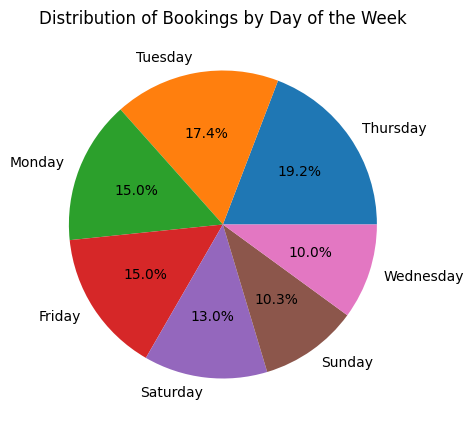

The day with the highest number of bookings is Thursday = 65


In [4]:
#3 Which days of the week have the highest number of bookings? Also,draw a pie chart to show the distribution for all days of the week?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds1['booking_id'] = ds1['booking_id'].astype(str)
ds1['booking_time'] = pd.to_datetime(ds1['booking_time'])
ds1['day_of_week'] = ds1['booking_time'].dt.day_name()

booking_counts = ds1['day_of_week'].value_counts()
print('Days of the Week with Highest Number of Bookings : ')
print(booking_counts)

plt.figure(figsize=(5,5))
plt.pie(booking_counts, labels=booking_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Bookings by Day of the Week')
plt.show()

high_demand = booking_counts.idxmax()
best_day_count = booking_counts.max()
print(f'The day with the highest number of bookings is {high_demand} = {best_day_count}')

In [5]:
#4 For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.

import pandas as pd
import numpy as np
total_service = ds1.groupby('service_name').agg({
    'booking_id': 'count',
    'INR_Amount': 'sum'
}).reset_index()
print('Total Bookings and Gross Booking Value by Service Name : ')
print(total_service)

Total Bookings and Gross Booking Value by Service Name : 
  service_name  booking_id  INR_Amount
0      GOIBIBO         186  5897637.97
1          MMT          48   665669.08
2        YATRA         105  3378702.13


In [6]:
#5 For customers who have more than 1 booking, which is the most booked route (from_cityto to_city)?

import pandas as pd
import numpy as np

ds1['customer_id'] = ds1['customer_id'].astype(str)
ds1['booking_id'] = ds1['booking_id'].astype(str)
ds1['from_city'] = ds1['from_city'].astype(str)
ds1['to_city'] = ds1['to_city'].astype(str)
ds1['booking_time'] = pd.to_datetime(ds1['booking_time'])
ds1 = ds1.sort_values(by='booking_time')

frequent_booking = ds1['customer_id'].value_counts()
customers_with_multiple_bookings = frequent_booking[frequent_booking > 1].index

frequent_route = ds1[ds1['customer_id'].isin(customers_with_multiple_bookings)]
frequent_route = frequent_route.groupby(['from_city', 'to_city']).size().idxmax()
print('Most Booked Route for Customers with More than 1 Booking : ')
print(frequent_route)



Most Booked Route for Customers with More than 1 Booking : 
('Gurgaon', 'Roissy-en-France')


In [7]:
#6 Which are the top3 departure cities from where customers book mostly in advance, provided that there have been atleast 5 departures from that city?

import pandas as pd
import numpy as np

departures = ds1['from_city'].value_counts()
min_departures_cities = departures[departures >= 5].index
print(departures)

filter_bookings = ds1[ds1['from_city'].isin(min_departures_cities)]
average_days_to_departure = filter_bookings.groupby('from_city')['days_to_departure'].mean().reset_index()
top_departure_cities = average_days_to_departure.sort_values(by='days_to_departure', ascending=False).head(3)
print("Top 3 departure cities where customers book mostly in advance:")
print(top_departure_cities)


from_city
Gurgaon               136
Mumbai                 34
Delhi                  29
Devanhalli             24
Rāja Sānsi             17
Chennai                16
Ahmedabad               8
New Delhi               7
Bālāpur                 6
Madhyamgram             6
Thiruvananthapuram      4
Varanasi                4
Kochi                   4
Hyderabad               4
Surat                   4
Jaipur                  4
Pune                    4
Patna                   2
Durlaga                 2
Kolkata                 2
Angamāli                2
Chicalim                2
Bhubaneswar             2
Bangalore               2
Dharamsala              1
Indore                  1
Nagpur                  1
Bikaner                 1
Barelā                  1
Ranchi                  1
Thrissur                1
Lucknow                 1
Jammu                   1
Mohali                  1
Hyderābād               1
Gannavaram              1
Ferokh                  1
Agartala                1
Na

The pair of numerical columns with the maximum correlation is ('INR_Amount', 'distance_km') with a correlation of 0.59


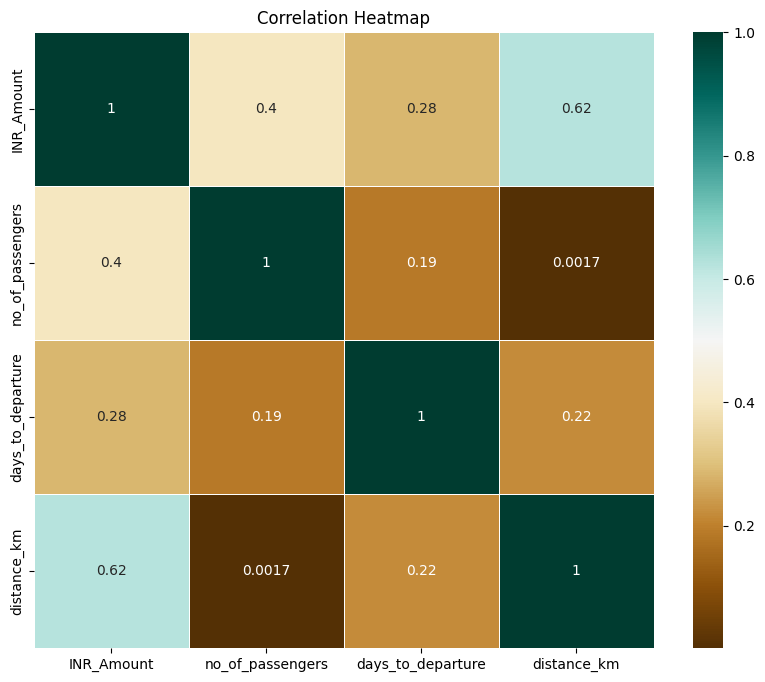

In [8]:
#7 Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset, have the maximum correlation?

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corelation_data = ds1.select_dtypes(include=[np.number])
corelation_matrix = corelation_data.corr()

heatmap_data = corelation_matrix.corr()
heatmap_data_no_dig = heatmap_data.where(~np.eye(heatmap_data.shape[0], dtype=bool))
max_corr = heatmap_data_no_dig.stack().idxmax()
max_corr_value = heatmap_data_no_dig.stack().max()
print(f'The pair of numerical columns with the maximum correlation is {max_corr} with a correlation of {max_corr_value:.2f}')

plt.figure(figsize=(10, 8))
sns.heatmap(corelation_matrix, annot=True, cmap='BrBG', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
#8 For each service, which is the most used device type for making bookings on the platform?

import pandas as pd
widely_used_device = ds1.groupby('service_name')['device_type_used'].value_counts().unstack(fill_value=0)
print('Widely Used Device Type by Service : ')
print(widely_used_device)


Widely Used Device Type by Service : 
device_type_used  Android  Desktop  IOS  MobileWeb  Tablet
service_name                                              
GOIBIBO                44       61   70         11       0
MMT                     8       30    5          5       0
YATRA                  18       51   22         11       3


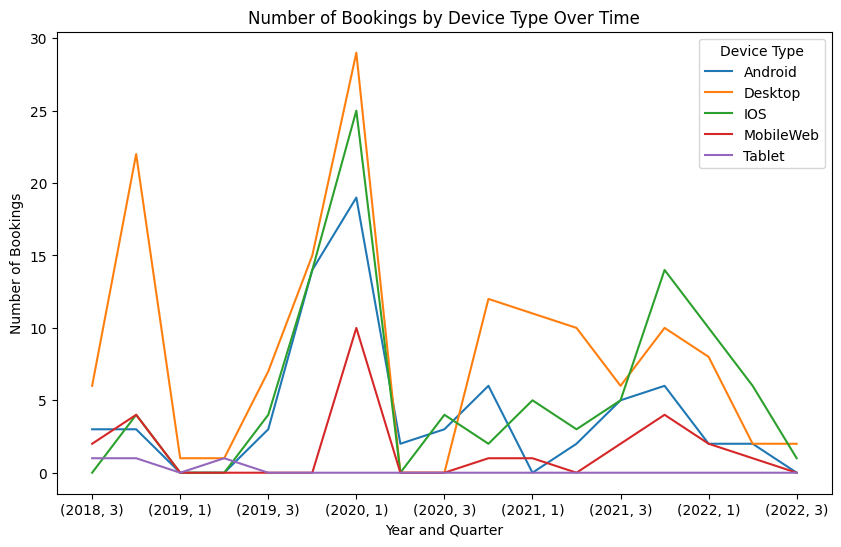

Android: 70
Desktop: 142
IOS: 97
MobileWeb: 27
Tablet: 3


In [10]:
#9 plot a time series for each year and quarter showing the number of bookings performed by each device type
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ds1['booking_time'] = pd.to_datetime(ds1['booking_time'])
ds1['year'] = ds1['booking_time'].dt.year
ds1['quarter'] = ds1['booking_time'].dt.quarter

booking_counts = ds1.groupby(['year', 'quarter', 'device_type_used']).size().unstack(fill_value=0)
booking_counts.plot(kind='line', figsize=(10, 6))
plt.title('Number of Bookings by Device Type Over Time')
plt.xlabel('Year and Quarter')
plt.ylabel('Number of Bookings')
plt.legend(title='Device Type')
plt.show()

for col in booking_counts.columns:
    print(f'{col}: {booking_counts[col].sum()}')




 converted booking data:
                 booking_time
53  2018-09-04 16:45:23+00:00
136 2018-09-11 14:03:16+00:00
31  2018-09-11 14:08:05+00:00
176 2018-09-21 16:29:59+00:00
237 2018-09-21 16:47:29+00:00

 converted session data:
                       search_time
0 2020-01-21 21:35:38.910000+00:00
1 2020-01-21 21:37:37.697000+00:00
2 2020-01-21 21:36:11.392000+00:00
3 2020-01-21 21:16:07.685000+00:00
4 2020-01-21 21:34:55.673000+00:00
monthly_obsr       month  monthly_obsr
0   2018-09      0.363636
1   2018-10      0.087379
2   2018-11      0.217391
3   2018-12      0.171429
4   2019-01      0.200000
5   2019-06      1.000000
6   2019-07      0.208333
7   2019-08      0.285714
8   2019-09      0.280000
9   2019-10      0.214286
10  2019-11      0.258065
11  2019-12      0.213115
12  2020-01      0.200000
13  2020-02      0.283582
14  2020-03      0.255319
15  2020-05           NaN
16  2020-06           NaN
17  2020-07           NaN
18  2020-08           NaN
19  2020-09           NaN

<ipython-input-11-378008aa3527>:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ds1['month'] = ds1['booking_time'].dt.to_period('M')
<ipython-input-11-378008aa3527>:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ds2['month'] = ds2['search_time'].dt.to_period('M')


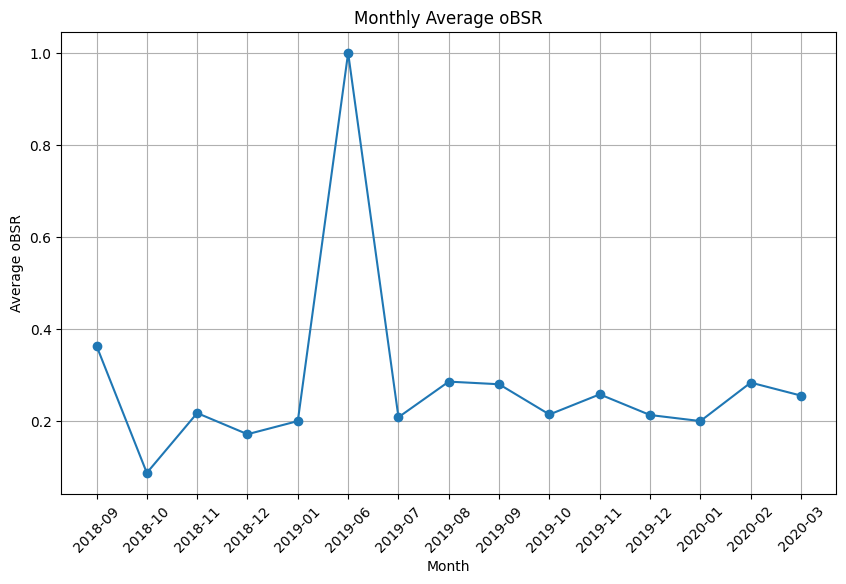

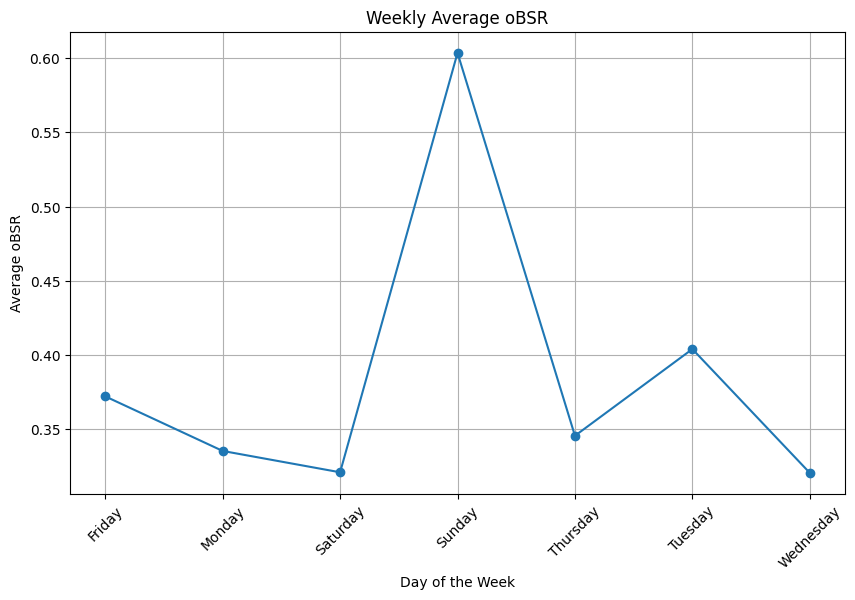

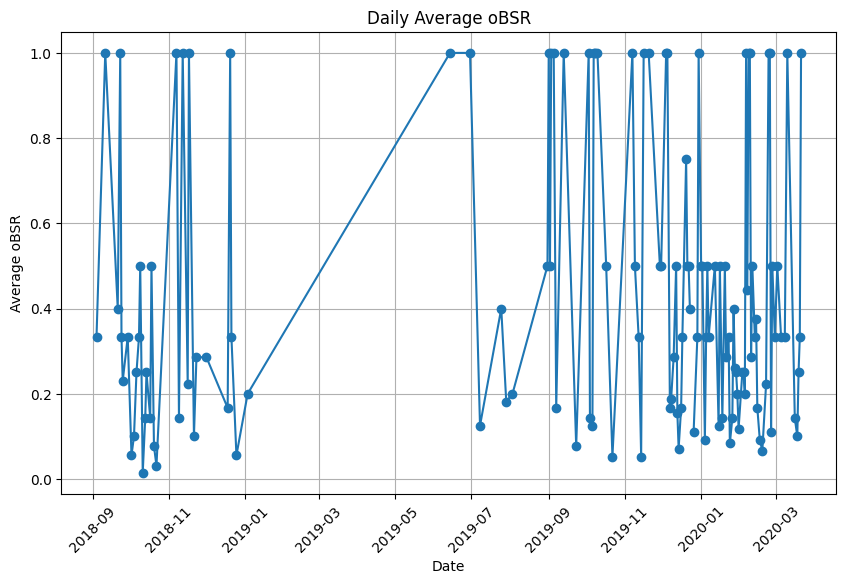

In [11]:
#10 example
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Convert timestamps to datetime format specifying ISO 8601 format
ds1['booking_time'] = pd.to_datetime(ds1['booking_time'], errors='coerce')
ds2['search_time'] = pd.to_datetime(ds2['search_time'], errors='coerce')

#datatime convertion
print("\n converted booking data:" )
print(ds1[['booking_time']].head())
print("\n converted session data:" )
print(ds2[['search_time']].head())

# Extract year-month and day of the week
ds1['month'] = ds1['booking_time'].dt.to_period('M')
ds2['month'] = ds2['search_time'].dt.to_period('M')

ds1['day_of_week'] = ds1['booking_time'].dt.day_name()
ds2['day_of_week'] = ds2['search_time'].dt.day_name()

ds1['date'] = ds1['booking_time'].dt.date
ds2['date'] = ds2['search_time'].dt.date

#avg oBSR booking n searches per month
monthly_bookings = ds1.groupby('month').size()
monthly_sessions = ds2.groupby('month').size()
monthly_obsr = (monthly_bookings / monthly_sessions).reset_index(name='monthly_obsr')
print('monthly_obsr', monthly_obsr)

#check monthky data
print('\nMonthly oBSR data:')
print(monthly_obsr)

# avg oBSR bookings and searches per day of the week
weekly_bookings = ds1.groupby('day_of_week').size()
weekly_sessions = ds2.groupby('day_of_week').size()
weekly_obsr = (weekly_bookings / weekly_sessions).reset_index(name='weekly_obsr')

#check weekly data
print('\nWeekly oBSR data:')
print(weekly_obsr)

#bookings and searches per date
daily_bookings = ds1.groupby('date').size()
daily_sessions = ds2.groupby('date').size()
daily_obsr = (daily_bookings / daily_sessions).reset_index(name='daily_obsr')

#check daily base data
print('\nDaily oBSR data:')
print(daily_obsr)

#plot monthly obsr
plt.figure(figsize=(10, 6))
plt.plot(monthly_obsr['month'].astype(str), monthly_obsr['monthly_obsr'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average oBSR')
plt.title('Monthly Average oBSR')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#plot weekly obsr
plt.figure(figsize=(10, 6))
plt.plot(weekly_obsr['day_of_week'], weekly_obsr['weekly_obsr'], marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Average oBSR')
plt.title('Weekly Average oBSR')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#plot daily oBSR time series
plt.figure(figsize=(10, 6))
plt.plot(daily_obsr['date'], daily_obsr['daily_obsr'], marker='o')
plt.xlabel('Date')
plt.ylabel('Average oBSR')
plt.title('Daily Average oBSR')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
